In [88]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
#os.chdir('/Users/Sriram/Desktop/DePaul/Q5/CSC529/Project 1/Analyzing-Housing-Data') # set to data dir
os.chdir('C:/Users/SYARLAG1/Desktop/Analyzing-Housing-Data')

In [89]:
# read in data
data = pd.read_csv('ames.csv', na_values='NA')
# data documentation: https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt

In [90]:
data.shape # 81 features

(2930, 82)

In [91]:
pd.set_option('display.max_columns', None)
data.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [92]:
# converting variables into strings
data['Year.Built'] = data['Year.Built'].astype('str') # year
data['Yr.Sold'] = data['Yr.Sold'].astype('str') # year
data['MS.SubClass'] = data['MS.SubClass'].astype('str')
data['Overall.Qual'] = data['Overall.Qual'].astype('str')
data['Overall.Cond'] = data['Overall.Cond'].astype('str')
data['Bsmt.Full.Bath'] = data['Bsmt.Full.Bath'].astype('str') # discrete
data['Bsmt.Half.Bath'] = data['Bsmt.Half.Bath'].astype('str') # discrete
data['Full.Bath'] = data['Full.Bath'].astype('str') # discrete
data['Half.Bath'] = data['Half.Bath'].astype('str') # discrete
data['Bedroom.AbvGr'] = data['Bedroom.AbvGr'].astype('str') # discrete
data['Kitchen.AbvGr'] = data['Kitchen.AbvGr'].astype('str') # discrete
data['TotRms.AbvGrd'] = data['TotRms.AbvGrd'].astype('str') # discrete
data['Fireplaces'] = data['Fireplaces'].astype('str') # discrete
data['Garage.Yr.Blt'] = data['Garage.Yr.Blt'].astype('str') # year
data['Garage.Cars'] = data['Garage.Cars'].astype('str') # month
data['Mo.Sold'] = data['Mo.Sold'].astype('str') # year
data['Yr.Sold'] = data['Yr.Sold'].astype('str') # month

In [93]:
# clean the data
## remove unnecessary features (PID, Order)
del data['Order']
del data['PID']
del data['MS.SubClass']

In [94]:
## filling missing values
NaNLst = np.sum(data.isnull(),0) # missing value count by feature
NaNLst[NaNLst > 0]

Lot.Frontage       490
Alley             2732
Mas.Vnr.Type        23
Mas.Vnr.Area        23
Bsmt.Qual           80
Bsmt.Cond           80
Bsmt.Exposure       83
BsmtFin.Type.1      80
BsmtFin.SF.1         1
BsmtFin.Type.2      81
BsmtFin.SF.2         1
Bsmt.Unf.SF          1
Total.Bsmt.SF        1
Electrical           1
Fireplace.Qu      1422
Garage.Type        157
Garage.Finish      159
Garage.Area          1
Garage.Qual        159
Garage.Cond        159
Pool.QC           2917
Fence             2358
Misc.Feature      2824
dtype: int64

We deal with missing values in each feature seperately. 

As a first step, let us look at plots of how certain features relate to the Sales Price variable. We only focus on the features with a very hihg number of missing values (>1000)

Based on the relationship, we can either discard the feature or fill in the missing values

In [95]:
def generatePlots(featureLst,data):
    for feature in featureLst:
        if data[feature].dtype == 'object':
            sns.stripplot(data[feature], data['SalePrice'], jitter=True)
            plt.show()
        else:
            sns.regplot(data[feature],data['SalePrice'], dropna=True)
            plt.show()
    return

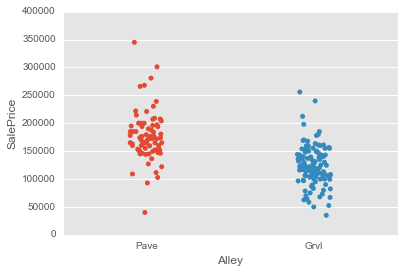

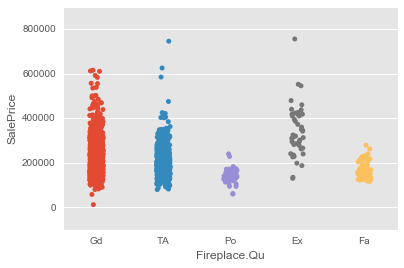

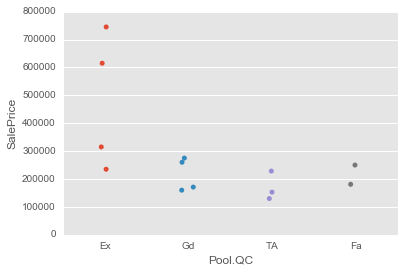

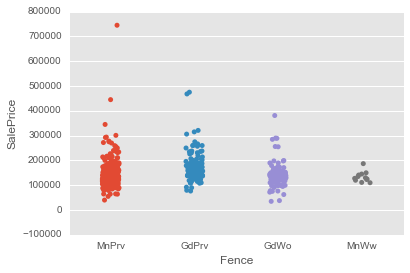

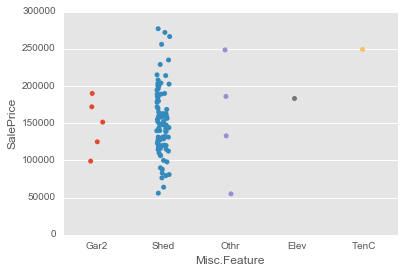

In [96]:
generatePlots(NaNLst[NaNLst > 1000].index,data)

Based on these plots and the NA count, it is evident that not all features are necessary -- for example, Misc Feature seems unnecessary -- it doesnt seem to assist in predicting the Sales Price, and at the same time is very sparsely filled in. Hence, we discard such variables. 

Variables that will be removed based on this analysis: Pool.QC, Misc.Feature, Fence, and Fireplace.Qu.

Variables like Alley, also have a high number of missing values (2732), however, since we can see a clear different in sales categories between their various classes, we will not remove such variables.

In [97]:
del data['Pool.QC']
del data['Misc.Feature']
del data['Fence']
del data['Fireplace.Qu']

In [98]:
from sklearn import linear_model # needed to impute missing values of continuous variables 

def NAFill(featureLst, data):
    for feature in featureLst:
        newFeatureVec = data[feature]
        if data[feature].dtype == 'object': # if data type is categorical, fill in with category closest to avg of Sales Price
            categoryDict = {}
            for category in set(data[feature]):
                categoryDict[category] = np.mean(data[data[feature] == category]['SalePrice']) # creating a dict of the means
                for index, value in enumerate(newFeatureVec):
                    if ~value.isnull():
                        continue
                    # the index that corresponds to lowest price
                    closestSalesPriceValueIdx = min(range(len(categoryDict.values())),key=lambda i:\
                                                    abs(categoryDict.values()[i]-data['SalePrice'][index]))
                    # the missing value replaced by corresponding category
                    newFeatureVec[index] = categoryDict.keys()[closestSalesPriceValueIdx] 
        else: # if feature is continuous, use regression to fill in missing value 
            reg = linear_model.LinearRegression()
            # use only the non-missing value for model
            x = data[data[feature].notnull()]['SalePrice'].to_frame
            y = data[data[feature].notnull()][feature].to_frame
            reg.fit(x, y) 
            for index, value in enumerate(newFeatureVec):
                if value.notnull():
                    continue
                newFeatureVec[index] = reg.predict(data['SalePrice'][index])
        
        data[feature] = newFeatureVec
        return data

In [99]:
NaNLst = np.sum(data.isnull(),0)

NAFill(NaNLst[NaNLst > 0].index, data)

TypeError: float() argument must be a string or a number

In [100]:
np.array(data[data['Alley'].notnull()]['SalePrice']).shape


(198L,)

In [101]:
np.array(data[data['Alley'].notnull()]['Alley']).shape

(198L,)

## Data Exploration

In [116]:
def exploreFeatures(data):
    for feature in data.columns:
        if feature == 'SalePrice': continue
        print 'Information About ', feature, ':\n'
        if data[feature].dtype == 'object':
            'Bar Plot: \n'
            sns.barplot(data[feature], data['SalePrice'])
            plt.show()
            'Value Counts: \n'
            data[feature].value_counts()
            print '\n'
        else:
            'Scatter Plot with Trend Line: \n'
            sns.regplot(data[feature],data['SalePrice'], dropna=True)
            plt.show()
            'Five-number summary: \n'
            print data[feature].describe()
            print '\n Correlation with Target Variable (SalePrice):\n'
            print np.corrcoef(data[feature],data['SalePrice'])
            print '\n\n'
            
    return

Information About  MS.Zoning :



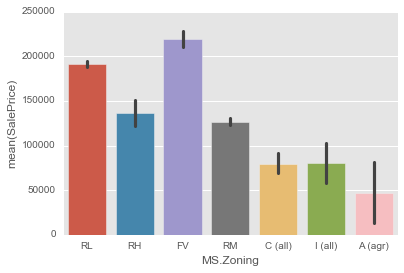



Information About  Lot.Frontage :



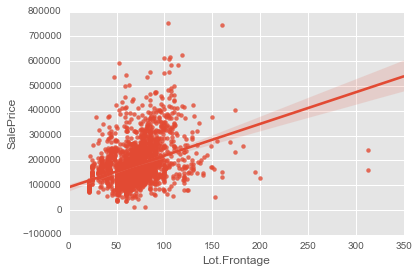

count    2440.000000
mean       69.224590
std        23.365335
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot.Frontage, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ nan  nan]
 [ nan   1.]]



Information About  Lot.Area :



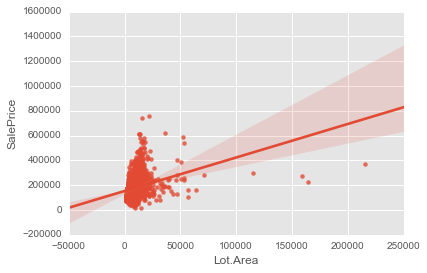

count      2930.000000
mean      10147.921843
std        7880.017759
min        1300.000000
25%        7440.250000
50%        9436.500000
75%       11555.250000
max      215245.000000
Name: Lot.Area, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.26654922]
 [ 0.26654922  1.        ]]



Information About  Street :



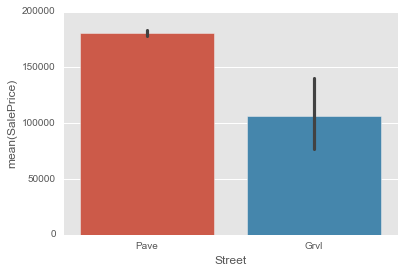



Information About  Alley :



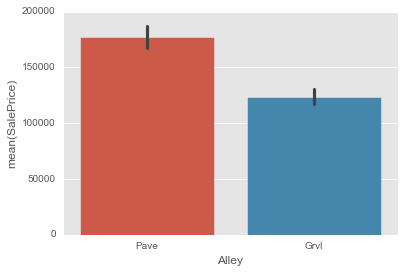



Information About  Lot.Shape :



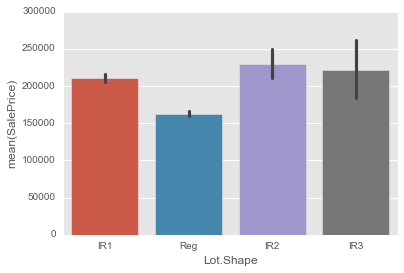



Information About  Land.Contour :



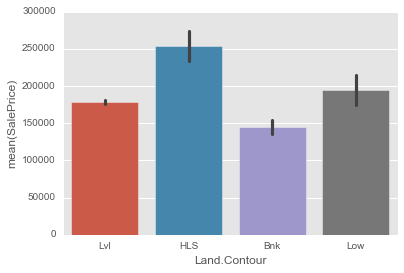



Information About  Utilities :



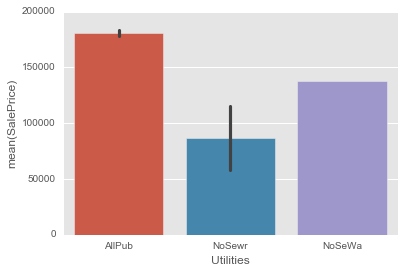



Information About  Lot.Config :



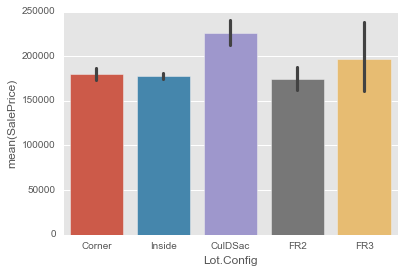



Information About  Land.Slope :



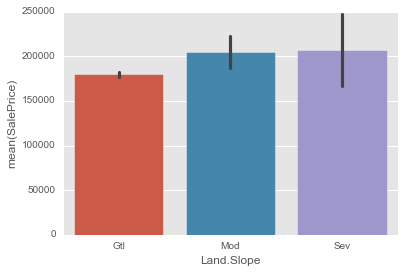



Information About  Neighborhood :



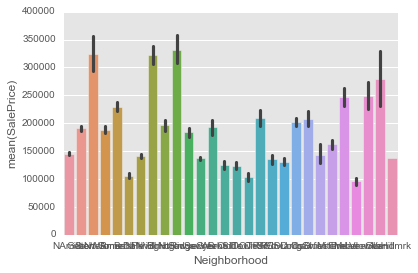



Information About  Condition.1 :



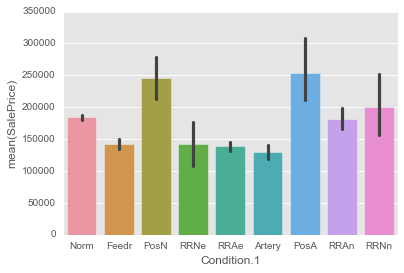



Information About  Condition.2 :



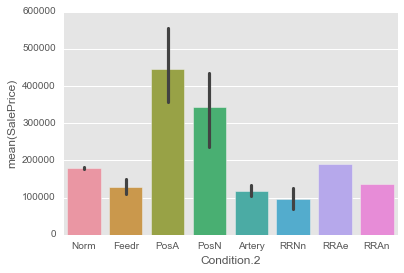



Information About  Bldg.Type :



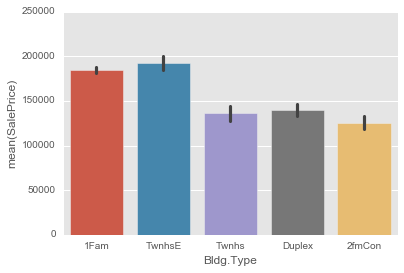



Information About  House.Style :



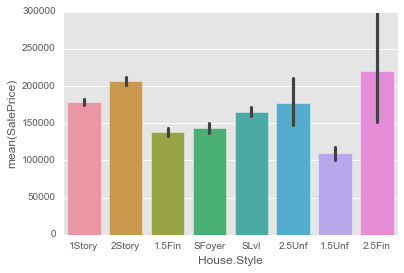



Information About  Overall.Qual :



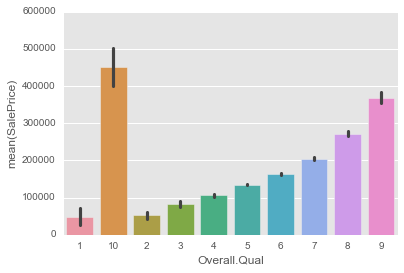



Information About  Overall.Cond :



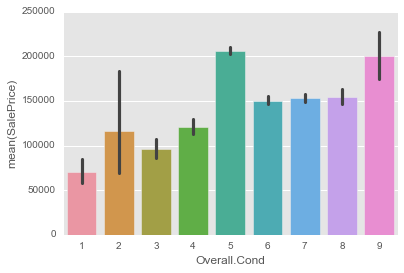



Information About  Year.Built :



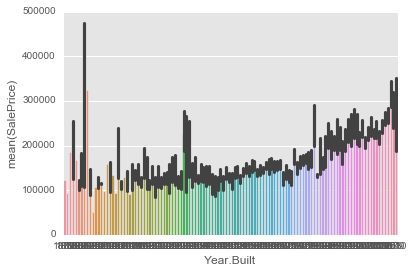



Information About  Year.Remod.Add :



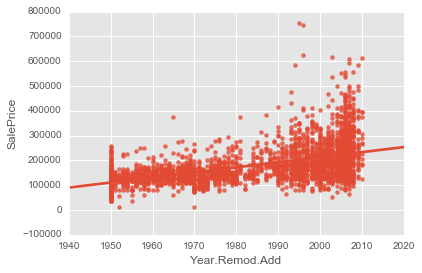

count    2930.000000
mean     1984.266553
std        20.860286
min      1950.000000
25%      1965.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: Year.Remod.Add, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.53297375]
 [ 0.53297375  1.        ]]



Information About  Roof.Style :



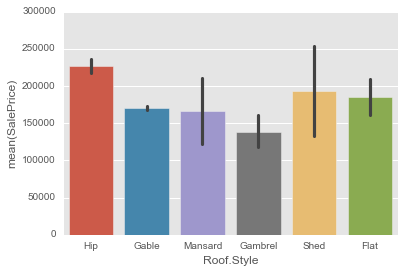



Information About  Roof.Matl :



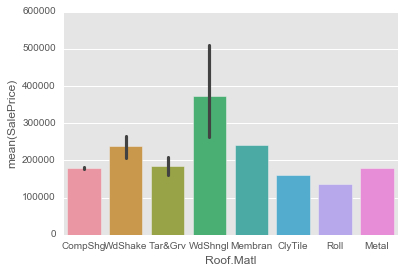



Information About  Exterior.1st :



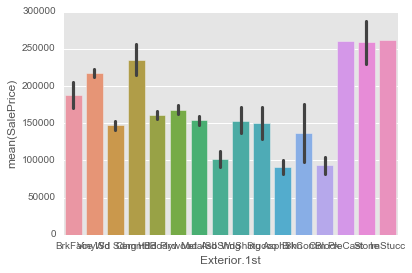



Information About  Exterior.2nd :



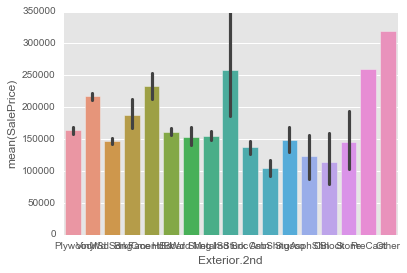



Information About  Mas.Vnr.Type :



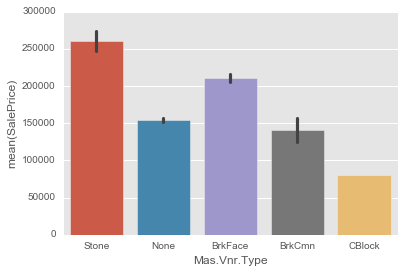



Information About  Mas.Vnr.Area :



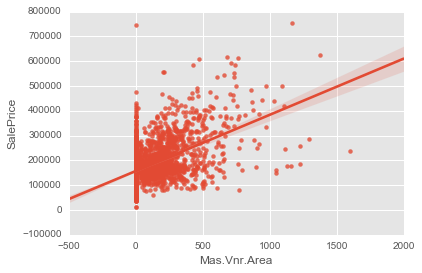

count    2907.000000
mean      101.896801
std       179.112611
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: Mas.Vnr.Area, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ nan  nan]
 [ nan   1.]]



Information About  Exter.Qual :



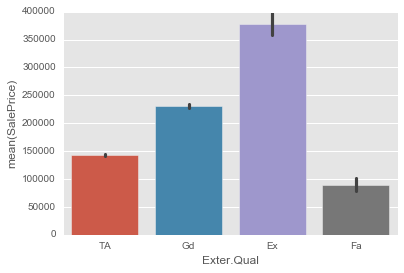



Information About  Exter.Cond :



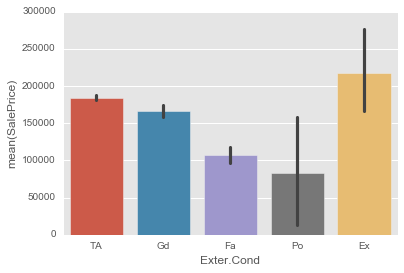



Information About  Foundation :



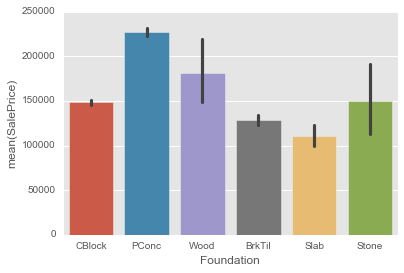



Information About  Bsmt.Qual :



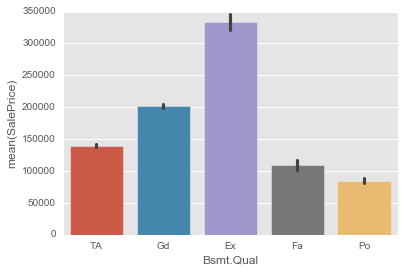



Information About  Bsmt.Cond :



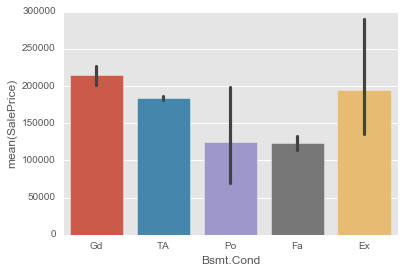



Information About  Bsmt.Exposure :



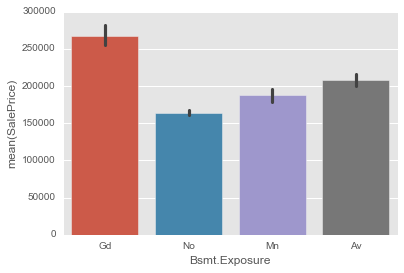



Information About  BsmtFin.Type.1 :



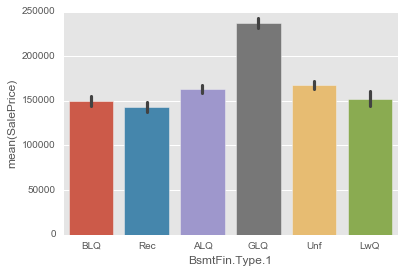



Information About  BsmtFin.SF.1 :



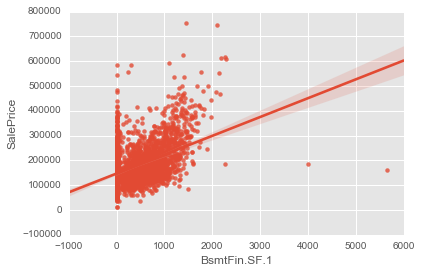

count    2929.000000
mean      442.629566
std       455.590839
min         0.000000
25%         0.000000
50%       370.000000
75%       734.000000
max      5644.000000
Name: BsmtFin.SF.1, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ nan  nan]
 [ nan   1.]]



Information About  BsmtFin.Type.2 :



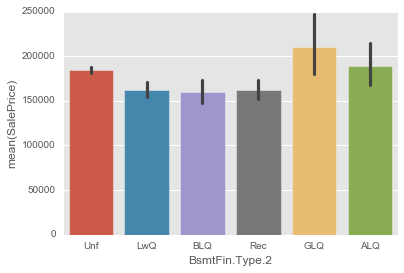



Information About  BsmtFin.SF.2 :



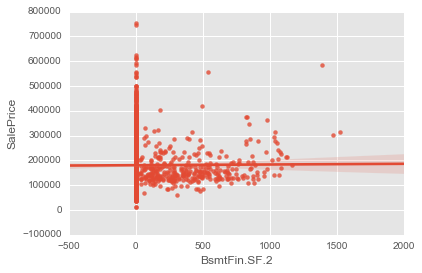

count    2929.000000
mean       49.722431
std       169.168476
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFin.SF.2, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ nan  nan]
 [ nan   1.]]



Information About  Bsmt.Unf.SF :



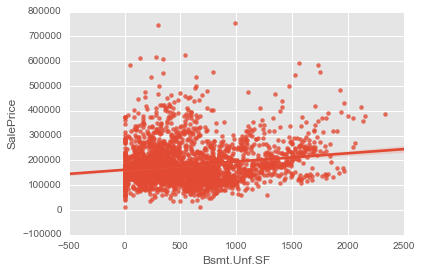

count    2929.000000
mean      559.262547
std       439.494153
min         0.000000
25%       219.000000
50%       466.000000
75%       802.000000
max      2336.000000
Name: Bsmt.Unf.SF, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ nan  nan]
 [ nan   1.]]



Information About  Total.Bsmt.SF :



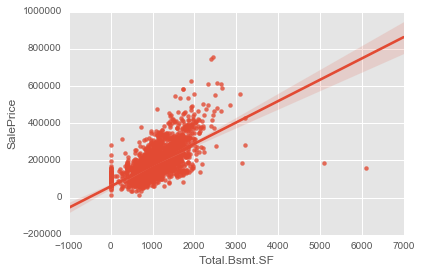

count    2929.000000
mean     1051.614544
std       440.615067
min         0.000000
25%       793.000000
50%       990.000000
75%      1302.000000
max      6110.000000
Name: Total.Bsmt.SF, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ nan  nan]
 [ nan   1.]]



Information About  Heating :



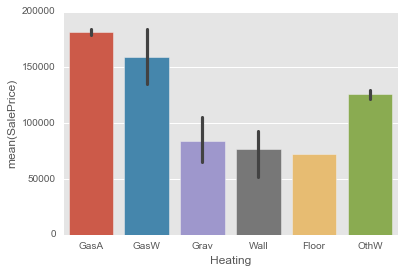



Information About  Heating.QC :



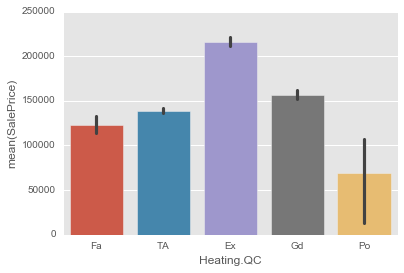



Information About  Central.Air :



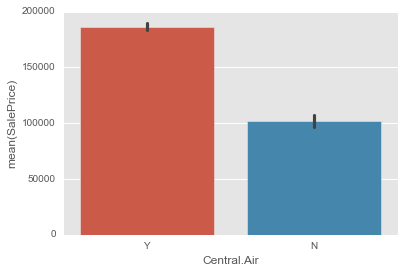



Information About  Electrical :



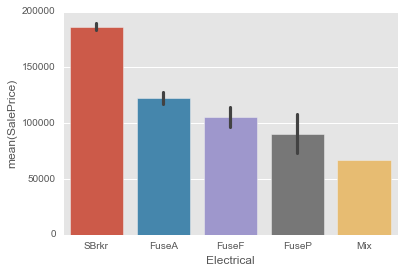



Information About  X1st.Flr.SF :



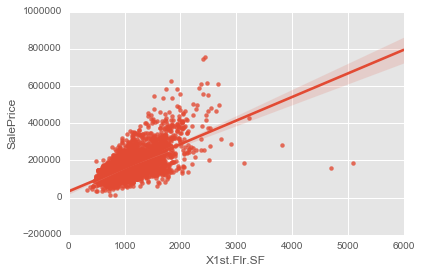

count    2930.000000
mean     1159.557679
std       391.890885
min       334.000000
25%       876.250000
50%      1084.000000
75%      1384.000000
max      5095.000000
Name: X1st.Flr.SF, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.62167606]
 [ 0.62167606  1.        ]]



Information About  X2nd.Flr.SF :



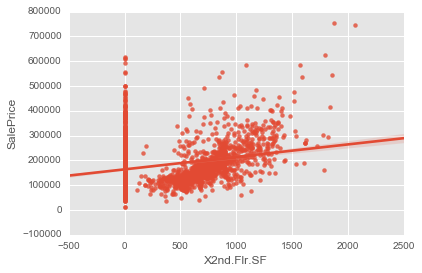

count    2930.000000
mean      335.455973
std       428.395715
min         0.000000
25%         0.000000
50%         0.000000
75%       703.750000
max      2065.000000
Name: X2nd.Flr.SF, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.26937336]
 [ 0.26937336  1.        ]]



Information About  Low.Qual.Fin.SF :



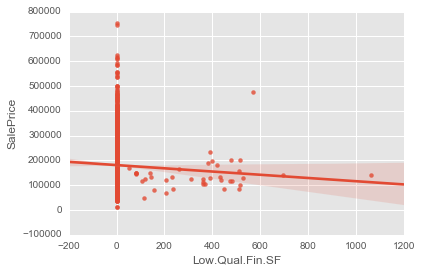

count    2930.000000
mean        4.676792
std        46.310510
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: Low.Qual.Fin.SF, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.         -0.03765977]
 [-0.03765977  1.        ]]



Information About  Gr.Liv.Area :



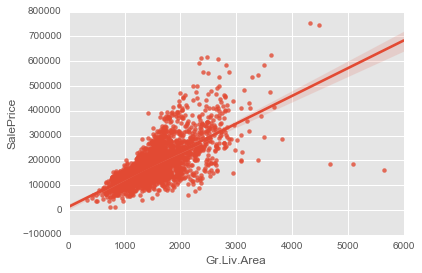

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr.Liv.Area, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.70677992]
 [ 0.70677992  1.        ]]



Information About  Bsmt.Full.Bath :



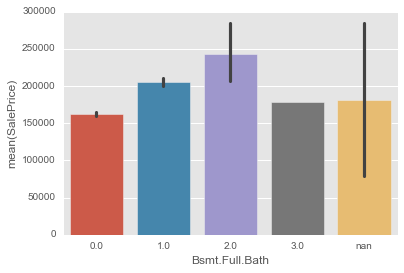



Information About  Bsmt.Half.Bath :



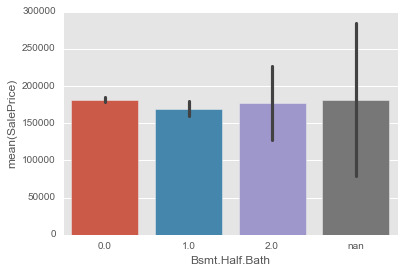



Information About  Full.Bath :



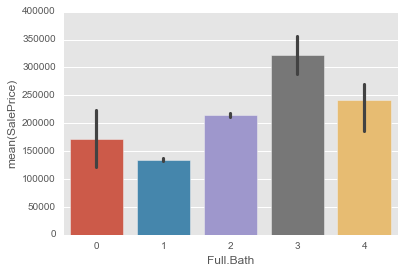



Information About  Half.Bath :



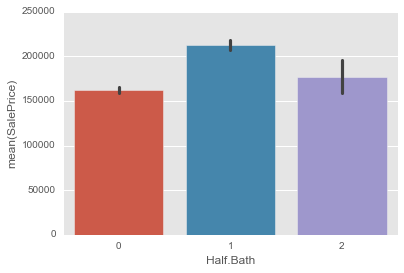



Information About  Bedroom.AbvGr :



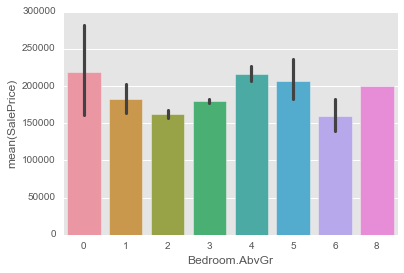



Information About  Kitchen.AbvGr :



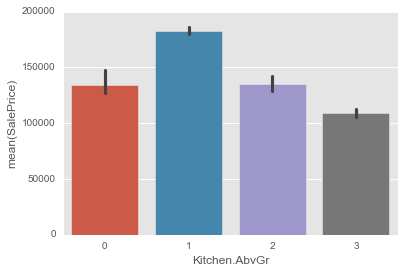



Information About  Kitchen.Qual :



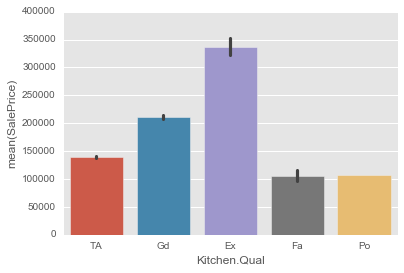



Information About  TotRms.AbvGrd :



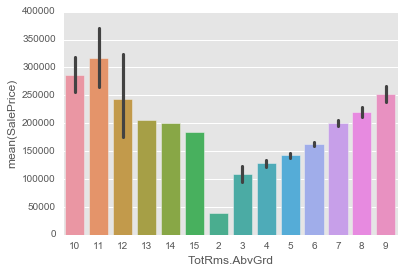



Information About  Functional :



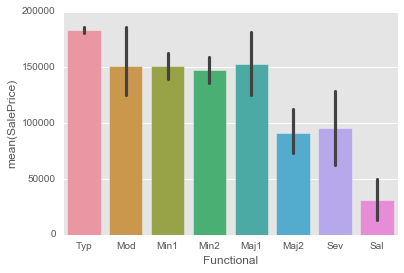



Information About  Fireplaces :



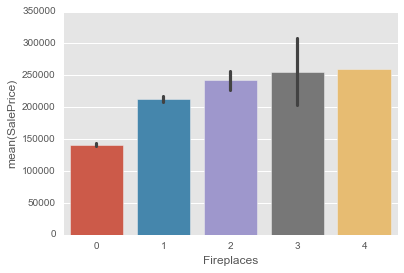



Information About  Garage.Type :



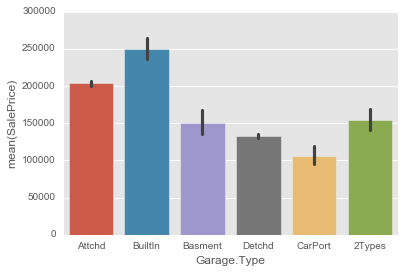



Information About  Garage.Yr.Blt :



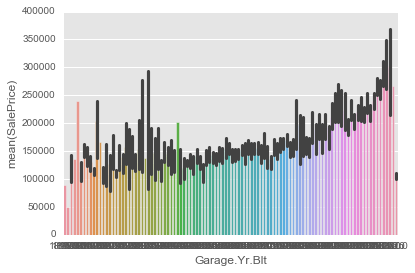



Information About  Garage.Finish :



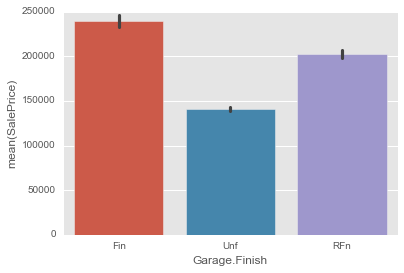



Information About  Garage.Cars :



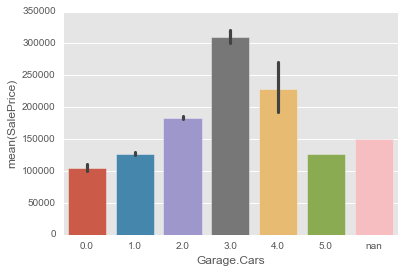



Information About  Garage.Area :



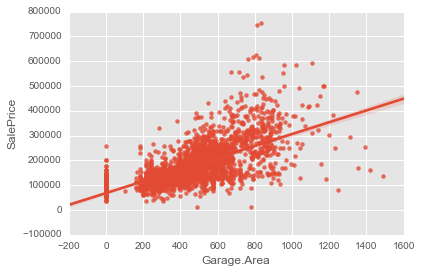

count    2929.000000
mean      472.819734
std       215.046549
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: Garage.Area, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ nan  nan]
 [ nan   1.]]



Information About  Garage.Qual :



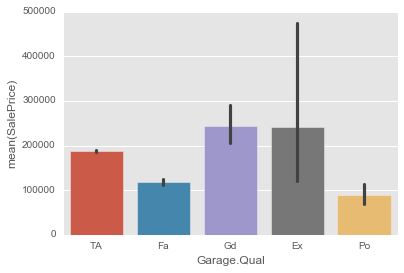



Information About  Garage.Cond :



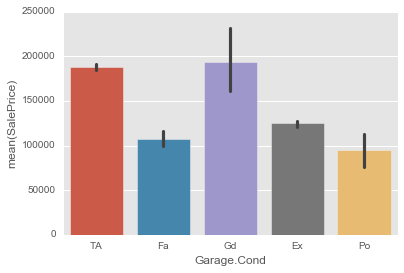



Information About  Paved.Drive :



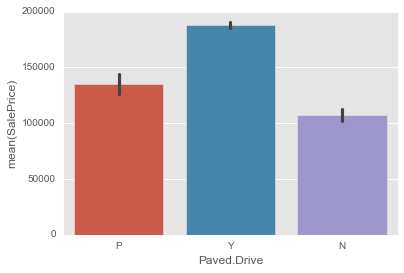



Information About  Wood.Deck.SF :



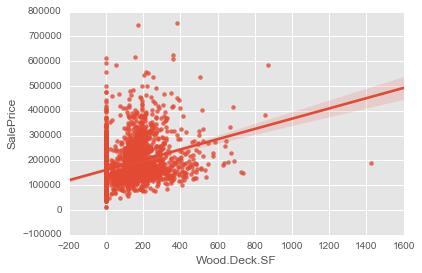

count    2930.000000
mean       93.751877
std       126.361562
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: Wood.Deck.SF, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.32714317]
 [ 0.32714317  1.        ]]



Information About  Open.Porch.SF :



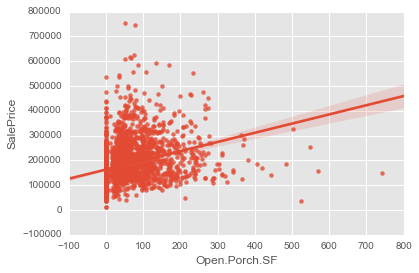

count    2930.000000
mean       47.533447
std        67.483400
min         0.000000
25%         0.000000
50%        27.000000
75%        70.000000
max       742.000000
Name: Open.Porch.SF, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.31295051]
 [ 0.31295051  1.        ]]



Information About  Enclosed.Porch :



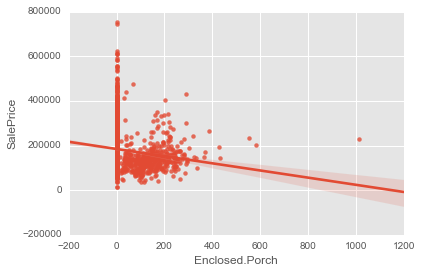

count    2930.000000
mean       23.011604
std        64.139059
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1012.000000
Name: Enclosed.Porch, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.         -0.12878744]
 [-0.12878744  1.        ]]



Information About  X3Ssn.Porch :



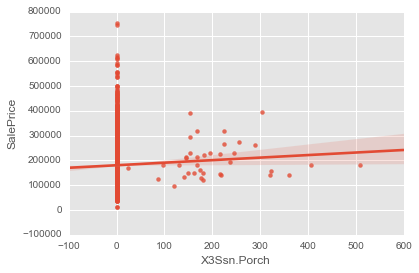

count    2930.000000
mean        2.592491
std        25.141331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: X3Ssn.Porch, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.03222465]
 [ 0.03222465  1.        ]]



Information About  Screen.Porch :



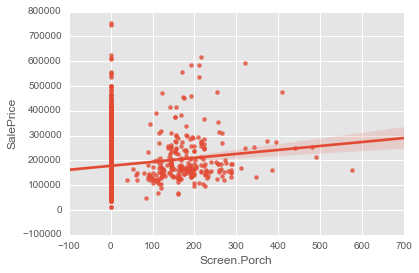

count    2930.000000
mean       16.002048
std        56.087370
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       576.000000
Name: Screen.Porch, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.11215121]
 [ 0.11215121  1.        ]]



Information About  Pool.Area :



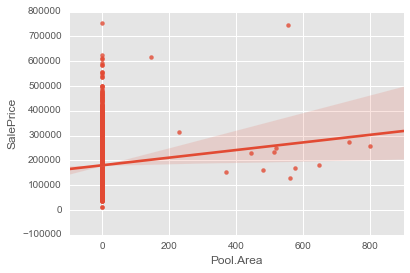

count    2930.000000
mean        2.243345
std        35.597181
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: Pool.Area, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.          0.06840325]
 [ 0.06840325  1.        ]]



Information About  Misc.Val :



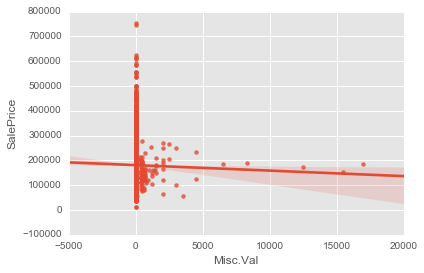

count     2930.000000
mean        50.635154
std        566.344288
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: Misc.Val, dtype: float64

 Correlation with Target Variable (SalePrice):

[[ 1.         -0.01569146]
 [-0.01569146  1.        ]]



Information About  Mo.Sold :



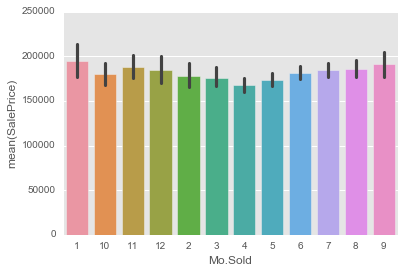



Information About  Yr.Sold :



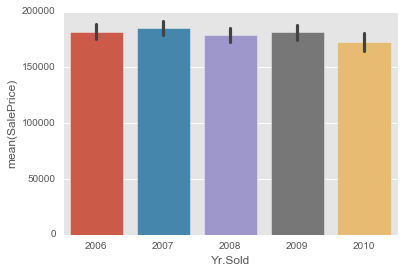



Information About  Sale.Type :



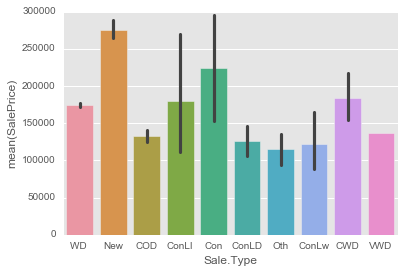



Information About  Sale.Condition :



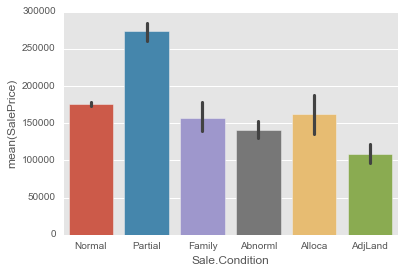

In [117]:
exploreFeatures(data)

In [ ]:
#  + xgboost